In [1]:
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

In [2]:


import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Layer, Lambda
from sklearn.model_selection import train_test_split
import os
import imageio
import cv2
import glob2
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils


Using TensorFlow backend.


In [3]:
import glob

In [4]:
example_image = imageio.imread('example.png')

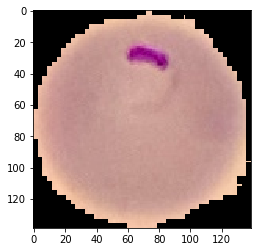

In [5]:
plt.imshow(example_image)

In [6]:
parasitized_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\')
#Importing the data for the parasitized cells

uninfected_cells = os.listdir('C:\\Users\\Thomas\\Malaria Project\\Uninfected')
#importing uninfected cell image data


In [7]:
print(len(parasitized_cells))
print(len(uninfected_cells))
#confirming all the data was put in 

13780
13780


In [8]:
data = []
labels = []

for img in parasitized_cells:
    try:
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Parasitized\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        print("Error with Parasitized cell")
        
for img in uninfected_cells:
    try: 
        img_read = plt.imread('C:\\Users\\Thomas\\Malaria Project\\Uninfected\\' + img)
        img_resize = cv2.resize(img_read, (50,50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        print("Error with uninfected cell")


Error with Parasitized cell
Error with uninfected cell


### Journaling an error
Doing a basic for loop above for some reason creates an error:
"OSError: cannot identify image file 'C:\\Users\\Thomas\\Malaria Project\\Parasitized\\Thumbs.db'"

I tried searching for Thumbs.db but I could not find it so probalby some kind of hidden file and that is what required a try/except loop instead of a simple for loop.  This was not a problem I had anticipated. 

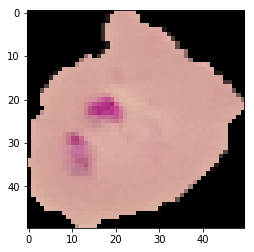

In [9]:
#Checking to see if the images were imported
plt.imshow(data[3])
plt.show()

In [10]:
image_data = np.array(data)
labels = np.array(labels)

In [11]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [12]:
import collections

labels
collections.Counter(labels)

Counter({1: 13779, 0: 13779})

In [13]:
#Train test split time
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = .2, random_state = 42)

In [14]:
import collections

collections.Counter(y_test)


Counter({1: 2799, 0: 2713})

In [15]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)

y_test  = np_utils.to_categorical(y_test, num_classes = 2)

In [16]:
print(f"Shape of training image data : {x_train.shape}")
print(f"Shape of testing image data : {x_test.shape}")
print(f"Shape of training labels : {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training image data : (22046, 50, 50, 3)
Shape of testing image data : (5512, 50, 50, 3)
Shape of training labels : (22046, 2)
Shape of testing labels: (5512, 2)


In [17]:


import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers



In [18]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
   
    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

## 12/12 New issue
So with removing the one layer in the CNN the accuraccy goes down the drain along with all of the metrics until the data augmentation comes in. 

In [19]:
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, 
                channels = channels)
model.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
____________________

In [20]:
import keras_metrics
import tensorflow as tf

In [21]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
keras.backend.get_session().run(tf.global_variables_initializer())

In [23]:
first_model = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 11s 488us/step - loss: 0.5836 - acc: 0.7327 - f1_m: 0.7327 - precision_m: 0.7327 - recall_m: 0.73275s - loss: 0.7587 - a
Epoch 2/20
22046/22046 [==============================] - 8s 378us/step - loss: 0.2440 - acc: 0.9082 - f1_m: 0.9082 - precision_m: 0.9082 - recall_m: 0.9082
Epoch 3/20
22046/22046 [==============================] - 10s 458us/step - loss: 0.2030 - acc: 0.9277 - f1_m: 0.9277 - precision_m: 0.9277 - recall_m: 0.9277
Epoch 4/20
22046/22046 [==============================] - 9s 402us/step - loss: 0.1876 - acc: 0.9370 - f1_m: 0.9370 - precision_m: 0.9370 - recall_m: 0.9370
Epoch 5/20
22046/22046 [==============================] - 9s 390us/step - loss: 0.1855 - acc: 0.9392 - f1_m: 0.9392 - precision_m: 0.9392 - recall_m: 0.9392 0s - loss: 0.1858 - acc: 0.9389 - f1_m: 0.9389 - precision_m: 0.938
Epoch 6/20
22046/22046 [==============================] - 9s 420us/step - loss: 0.1792 - acc: 0.9423 - f1_m: 0.9423 - precis

In [24]:
predictions = model.evaluate(x_test, y_test)


print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

5512/5512 [==============================] - 1s 155us/step
LOSS : 0.12366933359917259
ACCURACY : 0.9606313497822931


In [25]:
y_pred = model.predict(x_test)
y_pred_tensor = tf.convert_to_tensor(y_pred, np.float32)
y_test_tensor = tf.convert_to_tensor(y_test, np.float32)
sess = tf.InteractiveSession()



In [40]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_pred)

In [30]:
print(y_pred)

[[0.17046946 0.8295306 ]
 [0.978452   0.02154795]
 [0.00976254 0.9902374 ]
 ...
 [0.00429072 0.9957093 ]
 [0.9850985  0.01490153]
 [0.11077217 0.8892278 ]]


In [38]:
y_pred2=np.argmax(y_pred, axis=1)
#confusion_matrix(y_test, y_pred2)

In [39]:
y_pred2
#confusion_matrix(y_test, y_pred2)

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [36]:
y_test2=np.argmax(y_test, axis=1)
confusion_matrix(y_test2, y_pred2)

array([[2648,   65],
       [ 152, 2647]], dtype=int64)

In [37]:
print('The precision is: '+ str((precision_m(y_test_tensor, y_pred_tensor)).eval()))
print('The recall is: '+ str((recall_m(y_test_tensor, y_pred_tensor)).eval()))
print('The f1 score is: '+ str((f1_m(y_test_tensor, y_pred_tensor)).eval()))

The precision is: 0.9606314
The recall is: 0.9606314
The f1 score is: 0.9606313


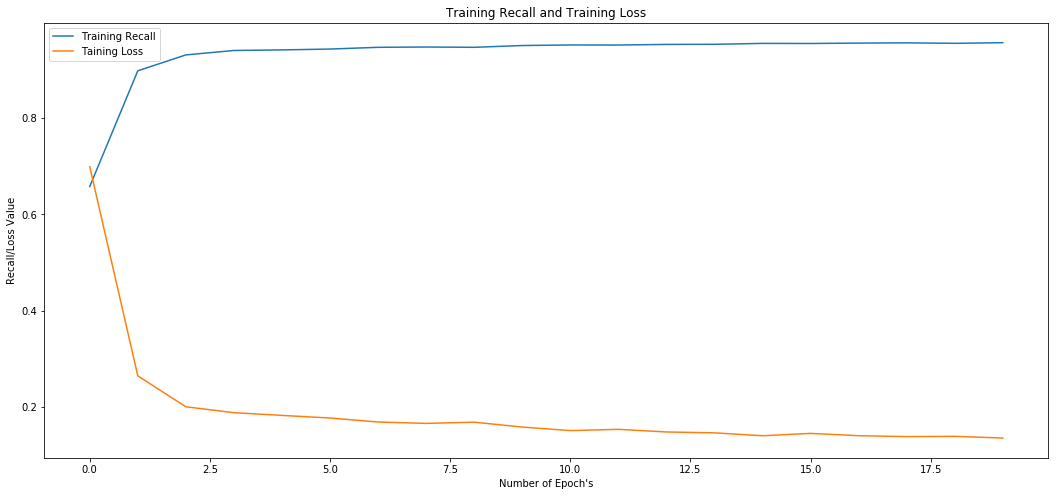

In [34]:
plt.figure(figsize = (18,8))
plt.plot(range(20), first_model.history['acc'], label = 'Training Recall')
plt.plot(range(20), first_model.history['loss'], label = 'Taining Loss')

plt.xlabel("Number of Epoch's")
plt.ylabel('Recall/Loss Value')
plt.title('Training Recall and Training Loss')
plt.legend(loc = "best")
#graphing how the accuracy and loss change over the epochs

In [35]:
print(type(y_test))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [37]:
from keras.models import load_model

Got a 96.3% accuracy score on the model.  This is without any data augmentation. 

In [41]:
from keras.preprocessing.image import ImageDataGenerator

In [42]:
train_datagen = ImageDataGenerator(#rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator() #rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = True)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [43]:
augmented_model = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [44]:

aug_optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
augmented_model.compile(loss = 'categorical_crossentropy', 
                        optimizer = aug_optim, 
                        metrics = ['acc',f1_m,precision_m, recall_m])

In [45]:
history_augmented_model = augmented_model.fit_generator(train_generator,
                                 steps_per_epoch = len(x_train) // 64,
                                epochs = 20)

Epoch 1/20
344/344 [==============================] - 15s 44ms/step - loss: 0.7415 - acc: 0.6560 - f1_m: 0.6560 - precision_m: 0.6560 - recall_m: 0.6560 6s - loss: 0.86
Epoch 2/20
344/344 [==============================] - 15s 44ms/step - loss: 0.4075 - acc: 0.8248 - f1_m: 0.8248 - precision_m: 0.8248 - recall_m: 0.8248
Epoch 3/20
344/344 [==============================] - 15s 44ms/step - loss: 0.3388 - acc: 0.8637 - f1_m: 0.8637 - precision_m: 0.8637 - recall_m: 0.8637 2s - loss: 0.3402 - acc: 0.8616 - f1_m: 0.8616 - precisi
Epoch 4/20
344/344 [==============================] - 15s 43ms/step - loss: 0.3147 - acc: 0.8801 - f1_m: 0.8801 - precision_m: 0.8801 - recall_m: 0.8801
Epoch 5/20
344/344 [==============================] - 15s 44ms/step - loss: 0.3041 - acc: 0.8862 - f1_m: 0.8862 - precision_m: 0.8862 - recall_m: 0.8862 6s - loss: 0.3
Epoch 6/20
344/344 [==============================] - 15s 44ms/step - loss: 0.2921 - acc: 0.8909 - f1_m: 0.8909 - precision_m: 0.8909 - recall_m: 0

In [46]:
prediction_2 = augmented_model.evaluate_generator(val_generator, steps = 5)

In [47]:


print(f'LOSS : {prediction_2[0]}')
print(f'ACCURACY : {prediction_2[1]}')

LOSS : 0.1257299430668354
ACCURACY : 0.96875


In [48]:
print(prediction_2)

[0.1257299430668354, 0.96875, 0.9687499523162841, 0.96875, 0.96875]


In [49]:

predict2 = augmented_model.evaluate_generator(val_generator, steps = 5)

print(f'LOSS : {prediction_2[0]}')
print(f'ACCURACY : {prediction_2[1]}')

LOSS : 0.1257299430668354
ACCURACY : 0.96875


In [54]:
#y_pred_augmented = augmented_model.predict_generator(val_generator, steps = 5)


config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 31} )
sess = tf.Session(config=config) 
sess.as_default()

y_test_tensor = tf.convert_to_tensor(y_test, np.float32)

y_pred_augmented = augmented_model.predict(x_test)
y_pred_augmented_tensor = tf.convert_to_tensor(y_pred_augmented, np.float32)
print('The precision is: '+ str((precision_m(y_test_tensor, y_pred_augmented_tensor)).eval(session=sess)))
print('The recall is: '+ str((recall_m(y_test_tensor, y_pred_augmented_tensor)).eval(session=sess)))
print('The f1 score is: '+ str((f1_m(y_test_tensor, y_pred_augmented_tensor)).eval(session=sess)))

The precision is: 0.9609942
The recall is: 0.9609942
The f1 score is: 0.9609941
